# UNIVERSITY OF CALGARY | ENGG 200
## Week 2: Working with Data in Python

Being able to work with a wide variety of data is critical to an engineer's role.  Microsoft Excel is an easy to use solution, and is frequently a good place to start, but Python provides more flexibilty, both for types of data as well as for data sizes.

### Objectives
* Read and process .csv files
* Use loops and conditionals to extract portions of the data
* Plot the data using `matplotlib`

### Data
In this worksheet, we will be exploring energy consumption data over three years for two buildings on the University of Calgary campus.  Data includes the following columns:
- Heating Use (kWh)
- Cooling Use (kWh)
- Electricity Use (kWh)
- Natural Gas Use (kWh)
- Water Use ($m^3$)

IMPORTANT: the data is contained in two files, `bulding1.csv` and `building2.csv`.  Be sure that this python notebook file and the two `.csv` files are in the same folder.

### Questions

We would like to answer to following questions:
1. Are there weekly, season and yearly trends in the data?  Do they make sense?
2. How did the campus shutdown in March 2020 affect energy use?
3. Compare the energy use of the two buildings.  How are they different?

## Task 1: Hypothesis
Before diving into the data, it is important to first hypothesize what you think the answers will be.  In the space below, write your hypothesis for the first two questions above.

<font color='red'>ANSWER HERE</font> (double click to activate cell editing)

## Task 2: Import the Data
The data we will be using is contained in two `.csv` files.  We will import the data in three ways:
- using the `csv` library
- using the `numpy` library
- using the `pandas` library

Note, `pandas` may not be installed by default on your computer.

### Using `csv`
**Step 1**: Load the necessary libraries: Python has a built-in `csv` library that is able to read and interpret csv files.  As a reminder, csv stands for comma separated values.

Let's read the first 5 lines of the csv file:

In [1]:
# load the csv library
import csv

# 'r' is read only
# 'w' is overwrite
# 'a' is append

with open('building1.csv', 'r') as file:
    reader = csv.reader(file)
    
    # let's read the first 5 lines
    counter = 0
    for row in reader:
        print(row)
        counter = counter = counter + 1
        if counter > 5:
            break

['Date', 'Heating (kWh)', 'Cooling (kWh)', 'Electricity (kWh)', 'Nat Gas (kWh)', 'Domestic Water (m3)']
['10/1/2018', '16244.46', '4920.66', '13240.1', '1319.45', '6.39']
['10/2/2018', '17772.24', '4882.56', '13108.56', '1413.89', '49.96']
['10/3/2018', '16852.79', '5163.91', '13307.63', '1288.89', '101.98']
['10/4/2018', '15450.01', '5117.02', '12917.94', '1422.22', '110.85']
['10/5/2018', '13422.23', '5225.46', '10770.25', '1413.89', '106.5']


**Step 2**: We want to import each column as a separate variable.  Let's do this for the first 5 rows again.

Note: `csv` reads all values as strings, not as floats (numbers).  We need to use `float()` to convert to a number, but as this may fail, it is useful to use a `try:` `except:` block.

In [2]:
time = []  # empty array called time
heating = [] # empty array called heating


with open('building1.csv', 'r') as file:
    reader = csv.reader(file)
    
    # let's read the first 5 lines
    counter = 0
    for row in reader:
        try:
            time.append(row[0])
            heating.append(float(row[1]))

        except:
            print('Row value conversion error')
        counter = counter = counter + 1
        if counter > 5:
            break
            
print(time)
print(heating)

Row value conversion error
['Date', '10/1/2018', '10/2/2018', '10/3/2018', '10/4/2018', '10/5/2018']
[16244.46, 17772.24, 16852.79, 15450.01, 13422.23]


This seems clunky, but there are other ways of importing that `csv` file.  

### Using `numpy`

**Alternative 1**: Use `numpy`.  `numpy` is a numerical library with a lot of built in functionality.  One function is to generate numpy arrays from text:

In [3]:
import numpy

data = numpy.genfromtxt('building1.csv', delimiter=",", encoding=None)
data

array([[         nan,          nan,          nan,          nan,
                 nan,          nan],
       [         nan, 1.624446e+04, 4.920660e+03, 1.324010e+04,
        1.319450e+03, 6.390000e+00],
       [         nan, 1.777224e+04, 4.882560e+03, 1.310856e+04,
        1.413890e+03, 4.996000e+01],
       ...,
       [         nan, 8.060030e+03, 3.833820e+03, 1.125303e+04,
        5.587430e+03, 1.278000e+01],
       [         nan, 9.048610e+03, 7.064980e+03, 1.160406e+04,
        5.607750e+03, 1.466000e+01],
       [         nan, 6.312820e+03, 8.190850e+03, 1.051837e+04,
        5.584340e+03, 3.450000e+00]])

As we can see, all the numbers are imported, but column names and dates are not by default.  

To get the data value in the 3rd row and 4th column, we use:

In [4]:
data[2,3]

13108.56

To get the entire 3rd row, we can use:

In [5]:
data[2,:]

array([     nan, 17772.24,  4882.56, 13108.56,  1413.89,    49.96])

The problem here is that non-numerical numbers are imported as `nan`, including the time column.

### Using `pandas`

**Alternative 2**: Use `pandas`.  `pandas` is a data importing and management library, among other things.  It makes importing csv files very easy:

In [6]:
import pandas

data = pandas.read_csv('building1.csv', sep=',', header=0)
data.head()

,Date,Heating (kWh),Cooling (kWh),Electricity (kWh),Nat Gas (kWh),Domestic Water (m3)
0,10/1/2018,16244.46,4920.66,13240.10,1319.45,6.39
1,10/2/2018,17772.24,4882.56,13108.56,1413.89,49.96
2,10/3/2018,16852.79,5163.91,13307.63,1288.89,101.98
3,10/4/2018,15450.01,5117.02,12917.94,1422.22,110.85
4,10/5/2018,13422.23,5225.46,10770.25,1413.89,106.50


We still need to convert the time column to the `datetime` datatype.  Note, this will take some time.

In [7]:
data['Date'] = pandas.to_datetime(data['Date'])

To print the first 5 rows of data, we can use the `head()` command.  `tail()` prints the last 5 rows of data.

In [8]:
data.head()

,Date,Heating (kWh),Cooling (kWh),Electricity (kWh),Nat Gas (kWh),Domestic Water (m3)
0,2018-10-01,16244.46,4920.66,13240.10,1319.45,6.39
1,2018-10-02,17772.24,4882.56,13108.56,1413.89,49.96
2,2018-10-03,16852.79,5163.91,13307.63,1288.89,101.98
3,2018-10-04,15450.01,5117.02,12917.94,1422.22,110.85
4,2018-10-05,13422.23,5225.46,10770.25,1413.89,106.50


### Task 3: Plot the Data
Now, let's plot the data.  The `matplotlib` library functions very similar to plotting in Matlab.

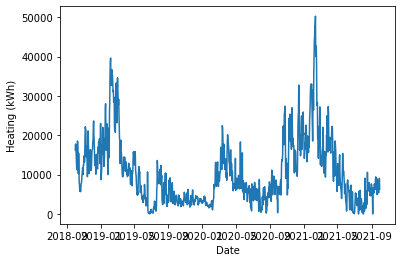

In [9]:
# import the pyplot function from matplotlib and then give it an alias, 'plt'
import matplotlib.pyplot as plt

plt.plot(data['Date'], data['Heating (kWh)'])
plt.xlabel('Date')
plt.ylabel('Heating (kWh)')
plt.show()

To plot multiple things at once, we can create subplots.  Let's plot all the data and overlay the different years on top of each other.  We can do that by selecting the data from a specific year, and then looping through the years.

Alternatively, you can also use the `groupby()` function in `pandas`.

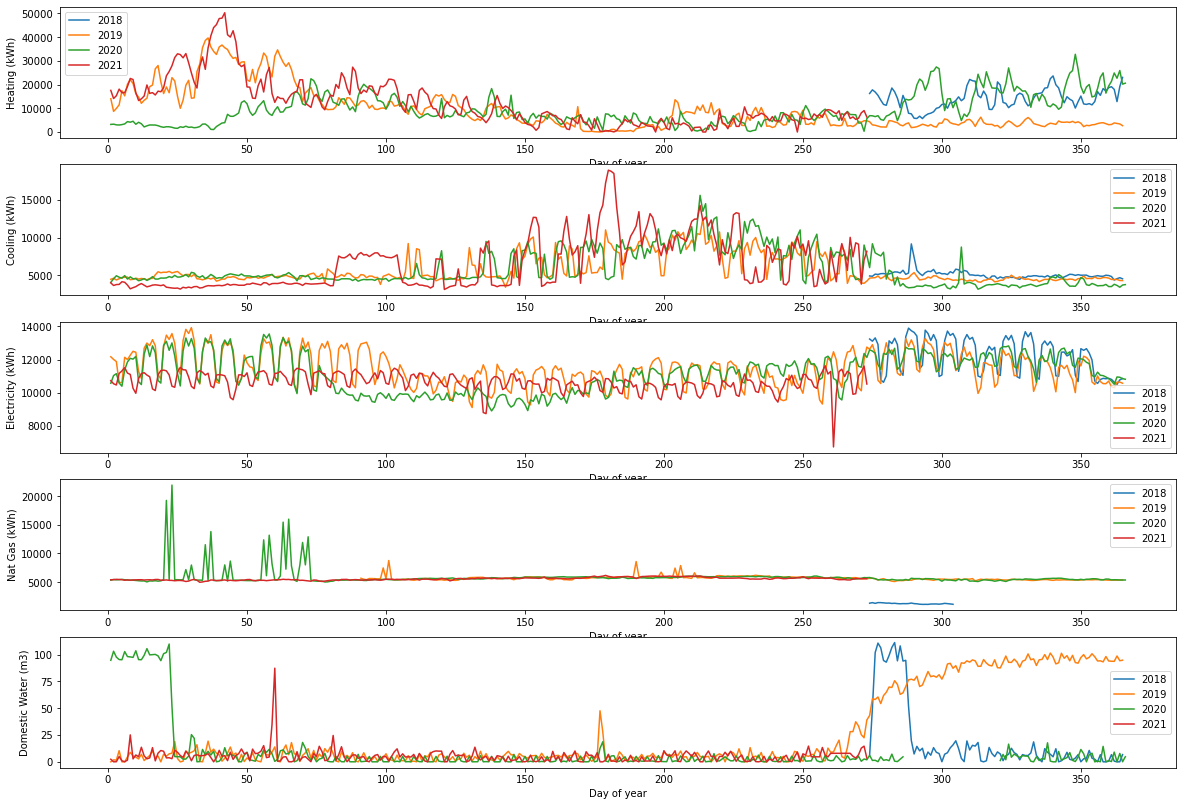

In [10]:
# helper variables to specify the years of interest and the columns.
years = [2018, 2019, 2020, 2021]
cols = ['Heating (kWh)', 'Cooling (kWh)', 'Electricity (kWh)', 'Nat Gas (kWh)', 'Domestic Water (m3)']

# Create a new figure with the number of subplots equal to the number of cols
# figsize specifies the figure size in [width, height] format
fig, ax = plt.subplots(nrows=len(cols), ncols=1, figsize=[20,14])

# Loop through the years to plot
for year in years:
    # Select the data from that year
    dat = data[data['Date'].dt.year == year]
    
    # Loop through the columns and plot the data in the appropriate subplot
    for idx in range(len(cols)):
        ax[idx].plot(dat['Date'].dt.dayofyear, dat[cols[idx]])
        
# Set the same xlabel for all subplots
plt.setp(ax, xlabel = 'Day of year')

# Loop through the subplots and set the appropriate ylabel
for idx in range(len(cols)):
    plt.setp(ax[idx], ylabel = cols[idx])
    
    # Add a legend to each subplot
    ax[idx].legend(years)
    
# Show the plot
plt.show()


Looking at the electricity data, there appears to be a weekly pattern.  And for heating use, there appears to be a seasonal pattern.  Let's use the `groupby()` function to look at this.

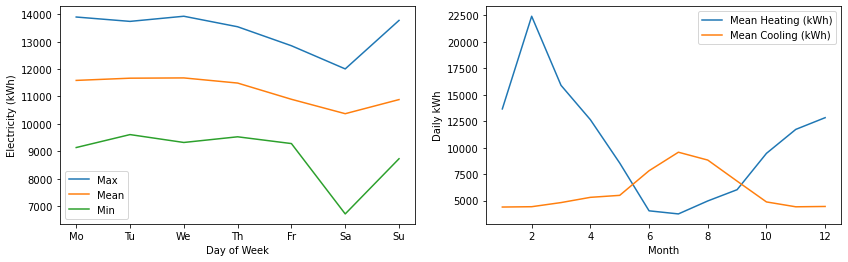

In [11]:
# Create a new figure
fig = plt.figure(figsize=[14,4])

# Create a new subplot.  '121' means 1 row, 2 columns, 1st subplot
axes1 = plt.subplot('121')

# Bin the data by day of the week
binned_data_by_day_of_week = data.groupby(data['Date'].dt.dayofweek)

# Plot the min, max and mean of the Electricity data
binned_data_by_day_of_week ['Electricity (kWh)'].max().plot(ax=axes1)
binned_data_by_day_of_week ['Electricity (kWh)'].mean().plot(ax=axes1)
binned_data_by_day_of_week ['Electricity (kWh)'].min().plot(ax=axes1)

# Create labels
plt.xlabel('Day of Week')

# dayofweek by default starts with Monday as index 0.  xticks() allows
# for custom tick labels
plt.xticks(range(7),['Mo', 'Tu', 'We', 'Th', 'Fr', 'Sa', 'Su'])
plt.ylabel('Electricity (kWh)')

# Add a legend
plt.legend(['Max', 'Mean', 'Min'])


# Create a new subplot.  '121' means 1 row, 2 columns, 2nd subplot
axes2 = plt.subplot('122')

# Bin the data by month
binned_data_by_month = data.groupby(data['Date'].dt.month)

# Plot the average monthly heating and cooling use
binned_data_by_month ['Heating (kWh)'].mean().plot(ax=axes2)
binned_data_by_month ['Cooling (kWh)'].mean().plot(ax=axes2)

# Add labels and a legend
plt.xlabel('Month')
plt.legend(['Mean Heating (kWh)', 'Mean Cooling (kWh)'])
plt.ylabel('Daily kWh')

# Show the plot
plt.show()

# Resources:

- Examples of different types of `matplotlib` charts: https://matplotlib.org/stable/gallery/
- Examples of charts created from `pandas` dataframes: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

# Assignment
Modify the code above, or add additional code below to answer the questions posed above.  Once you have completed your analysis for Building 1, compare your analysis with Building 2.

Show your instructor or TA your progress before the end of the seminar, and submit a `pdf` of this workbook to the D2L dropbox before the start of the seminar next week.

In [12]:
# Code Here